<h1 dir=rtl align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
تشخیص معدل دانش آموزان</font>
</h1>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در این سوال قصد داریم با استفاده از یک مجموعه‌داده که شامل اطلاعات دانش‌آموزان است، معدل آن‌ها را تخمین بزنیم. برای این‌کار شما باید پس از پیش‌پردازش داده‌ها، به مهندسی ویژگی و ساخت مدل مناسب بپردازید. توجه داشته باشید، در انتها، تنها مدل شما مورد بررسی قرار خواهد گرفت، اما مسلماً هرچه پیش‌پردازش و مهندسی ویژگی بهتری داشته باشید در نهایت به مدل بهتری خواهید رسید.

</font>
</p>

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معرفی مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در فایل اولیه‌ی این سوال یک پوشه با نام <code>data</code> قرار دارد.
    این پوشه شامل دو فایل با نام‌های <code>train.csv</code> و <code>test.csv</code> است که به‌ترتیب مجموعه‌داده‌ی آموزش و آزمون هستند.
    مجموعه‌داده‌ی آموزش این سوال شامل ۱۹۱۳ سطر و ۱۴ ستون است و
        مجموعه‌داده‌ی آزمون دارای ۴۷۹ سطر است و تنها ستون <code>GPA</code> را ندارد.
    توضیحات مربوط به ستون‌ها به شرح زیر است:
</font>
</p>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

| <b>نام ویژگی</b> | <b>توضیح ویژگی</b> |
| :---: | :---: |
| <code>StudentID</code> | شماره‌ی دانش‌آموزی|
| <code>Age</code> | سن فرد|
| <code>Gender</code> | جنسیت، ۰ برای آقایان و ۱ برای خانم‌ها|
| <code>Ethnicity</code> |قومیت دانش‌آموزان|
| <code>ParentalEducation</code> |سطح تصحیلات خانواده‌ی دانش‌آموز|
| <code>StudyTimeWeekly</code> | ساعت مطالعه‌ی هفتگی از ۰ تا ۲۰ ساعت|
| <code>Absences</code> | تعداد غیبت دانش‌آموز در یک سال تحصیلی از ۰ تا ۳۰|
| <code>Tutoring</code> | وضعیت تدریس خصوصی، ۰ نشان‌دهنده‌ی خیر و ۱ نشان‌دهنده بله|
| <code>ParentalSupport</code> | میزان حمایت والدین از دانش‌آموز|
| <code>Extracurricular</code> | شرکت در برنامه‌های فوق‌برنامه، ۰ نشان‌دهنده‌ی خیر و ۱ نشان‌دهنده‌ی بله|
| <code>Sports</code> | شرکت در برنامه‌های ورزشی، ۰ نشان‌دهنده‌ی خیر و ۱ نشان‌دهنده‌ی بله||
| <code>Music</code> | شرکت در برنامه‌های موسیقی، ۰ نشان‌دهنده‌ی خیر و ۱ نشان‌دهنده‌ی بله||
| <code>Volunteering</code> | شرکت در برنامه‌های داوطلبانه، ۰ نشان‌دهنده‌ی خیر و ۱ نشان‌دهنده‌ی بله||
| <code>GPA</code> | میانگین نمره در بازه‌ی صفر تا چهار|

</font>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:500%; font-family:vazir; font-size:medium">
<font color="red" size=3><b color='red'>توجه:</b></font>
<font face="vazir" size=3>
داده‌های ارزیابی ممکن است داده‌ی گم‌شده (Nan) داشته باشند.
</font>
</p>

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
خواندن مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در ابتدا نیاز است فایل‌های مجموعه‌داده را بخوانید. نمونه‌های آموزشی در فایل <code>train.csv</code> و نمونه‌های آزمون که باید مقدار متغیر هدف آن‌ها را پیش‌بینی کنید در فایل <code>test.csv</code> ذخیره شده‌اند. اگر لازم دانستید می‌توانید به دلخواه خود بخشی از مجموعه‌ی آموزش را به عنوان مجموعه‌ی اعتبارسنجی نیز جدا کنید.
</font>
</p>

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

<AxesSubplot: xlabel='GPA', ylabel='Count'>

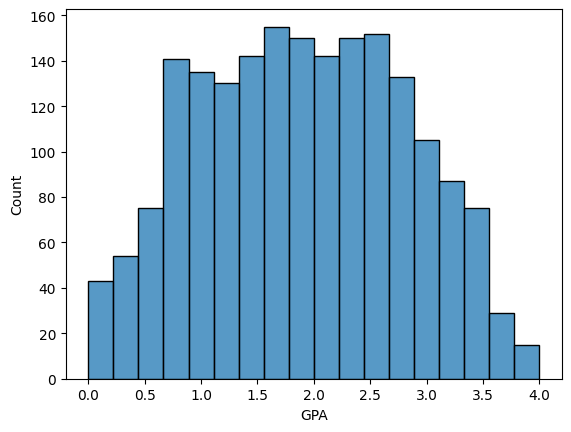

In [69]:
import seaborn as sns
sns.histplot(x=train_data['GPA'])

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش‌پردازش و مهندسی ویژگی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
        در این سوال شما می‌توانید از هر تکنیک پیش‌پردازش/مهندسی ویژگی دلخواهتان، استفاده کنید.
    <br>
    تکنیک‌هایی که استفاده می‌کنید به شکل مستقیم مورد ارزیابی توسط سامانه داوری قرار <b>نمی‌گیرند.</b> بلکه همه آن‌ها در دقت مدل شما تاثیر خواهند گذاشت؛ بنابراین هر چه پیش‌پردازش/مهندسی ویژگی بهتری انجام دهید تا دقت مدل بهبود پیدا کند، امتیاز بیشتری از این سوال کسب خواهید کرد.

</font>
</p>

In [77]:
X = train_data.drop(columns=["StudentID", "GPA"])
y = train_data["GPA"]

numeric_features = ["Age", "StudyTimeWeekly", "Absences"]
categorical_features = ["Gender", "Ethnicity", "ParentalEducation", "Tutoring", "ParentalSupport", "Extracurricular", "Sports", "Music", "Volunteering"]

# Pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
آموزش مدل
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    حال که داده را پاکسازی کرده و احتمالا ویژگی‌هایی را به آن افزوده یا از آن حذف کرده‌اید، وقت آن است که مدلی آموزش دهید که بتواند متغیر هدف این مسئله را پیش‌بینی کند.
</font>
</p>

In [78]:
# Model design
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

model.fit(X_train, y_train)# evaluate your model


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'StudyTimeWeekly',
                                                   'Absences']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Ethnicity',
                                                   'ParentalEducation',
                                                   'Tutoring',
                                                   'ParentalSupport',
                                                   'Extracurricular', 'Sports',
                                                   'Music',
                                                   'Volunteering'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معیار ارزیابی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    معیاری که برای ارزیابی عملکرد مدل انتخاب کرده‌ایم، <code>r2_score</code> نام دارد.
    <br>
    این معیار، سنجه ارزیابی کیفیت مدل شماست. به عبارت بهتر در سامانه داوری هم از همین معیار برای نمره‌دهی استفاده شده است.
    <br>
    پیشنهاد می‌شود با توجه به این معیار، عملکرد مدل خود را بر روی مجموعه‌ی آموزش یا اعتبارسنجی ارزیابی کنید.
</font>
</p>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font color="red"><b color='red'>توجه:</b></font>
<font face="vazir" size=3>
    برای دریافت نمره از این سوال لازم است تا دقت مدل شما از آستانه‌ی ۰.۴ بیشتر باشد.
    در صورتی که دقت مدل شما از ۰.۴ کمتر باشد نمره شما 
    <b>صفر</b>
    خواهد شد و در غیر این صورت با فرمول زیر محاسبه می‌شود:
</font>
</p>


In [79]:
y_pred = model.predict(X_val)
r2 = r2_score(y_val, y_pred)
r2

0.9217698974754345

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
 پیش‌بینی بر روی داده‌ی تست و خروجی
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    پیش‌بینی مدل خود بر روی داده‌های آزمون را در یک دیتافریم (<code>dataframe</code>) به فرمت زیر ذخیره کنید.
</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    توجه داشته باشید که نام دیتافریم باید <code>submission</code> باشد؛ در غیر این‌صورت، سامانه‌ی داوری قادر به ارزیابی خروجی شما نخواهد بود.
    این دیتافریم تنها شامل ۱ ستون با اسم <code>GPA</code> است و ۴۷۹ سطر دارد.
    <br>
    به ازای هر سطر موجود در مجموعه‌داده‌ی آزمون، باید یک مقدار پیش‌بینی‌شده داشته باشید.
    به‌عنوان مثال جدول زیر، ۵ سطر ابتدایی دیتافریم <code>submission</code> را نشان می‌دهد. البته این اعداد به‌صورت فرضی هستند و در جواب شما، اعداد ستون <code>GPA</code> ممکن است متفاوت باشند.
</font>
</p>

<center>
<div style="direction: ltr;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
||<code>GPA</code>|
|:----:|:-----:|
|0|2.6765|
|1|3.9865434|
|2|1.0323434|
|3|0.0434253|
|4|2.060680|

</font>
</div>
</center>

In [81]:
# To-Do
X_test = test_data.drop(columns=["StudentID"])
test_predictions = model.predict(X_test)

submission = pd.DataFrame(test_predictions, columns=['gpa'])
submission

,gpa
0,1.261946
1,3.002481
2,1.787976
3,3.517568
4,0.501570
...,...
474,1.608033
475,1.966197
476,2.622522
477,2.440936


<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) در غیر این صورت، در پایان مسابقه نمره شما به صفر تغییر خواهد کرد.
    <br>
    همچنین اگر از کولب برای اجرای این فایل نوت‌بوک استفاده می‌کنید، قبل از ارسال فایل <code>result.zip</code>، آخرین نسخه‌ی نوت‌بوک خود را دانلود کرده و داخل فایل ارسالی قرار دهید.
</font>

In [27]:
import zipfile

if not os.path.exists(os.path.join(os.getcwd(), 'Student_GPA.ipynb')):
    %notebook -e Student_GPA.ipynb

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

submission.to_csv('submission.csv', index=False)

file_names = ['Student_GPA.ipynb', 'submission.csv']
compress(file_names)

File Paths:
['Student_GPA.ipynb', 'submission.csv']


In [3]:
# Re-defining the X and y variables
X = train_data.drop(columns=['GPA', 'StudentID'])
y = train_data['GPA']

# Re-identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical data (imputation and scaling)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data (imputation and encoding)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Define model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_val, y_pred)
r2

NameError: name 'y_val' is not defined